In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

In [2]:
median_house_hold_in_come = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Fatal%20Police%20Shootings%20in%20the%20US/MedianHouseholdIncome2015.csv', encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Fatal%20Police%20Shootings%20in%20the%20US/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Fatal%20Police%20Shootings%20in%20the%20US/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Fatal%20Police%20Shootings%20in%20the%20US/ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Fatal%20Police%20Shootings%20in%20the%20US/PoliceKillingsUS.csv', encoding="windows-1252")

In [3]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [4]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


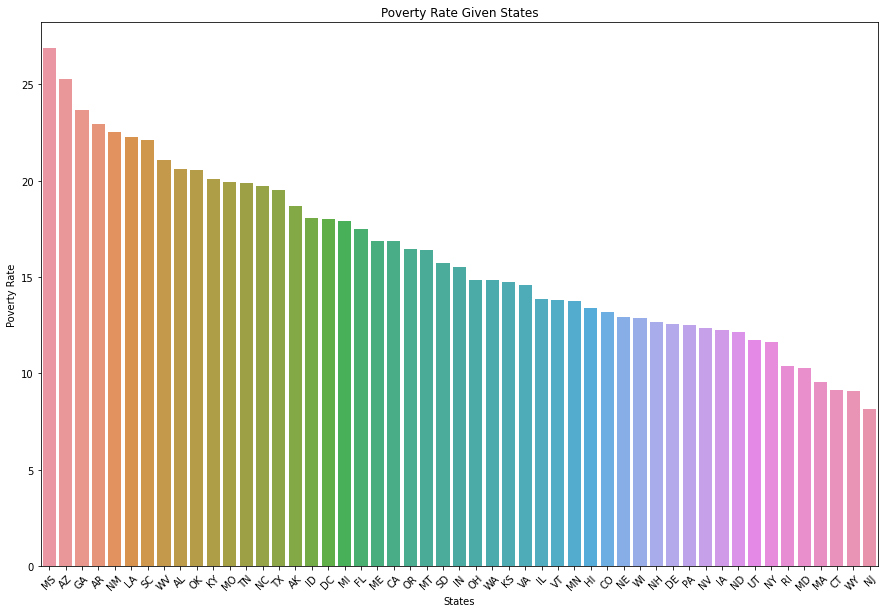

In [6]:
percentage_people_below_poverty_level.poverty_rate.replace("-",0.0,inplace = True) #chaning '-' sign with 0 value
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float) #changing type object to float
area_list = list(percentage_people_below_poverty_level["Geographic Area"].unique()) #creating new list to all unique states

area_poverty_ratio = []

for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level["Geographic Area"] == i] #taking state 'AL' etc.
    area_poverty_rate = sum((x.poverty_rate)/len(x)) #calculating ratio
    area_poverty_ratio.append(area_poverty_rate) 
    
data = pd.DataFrame({"area_list":area_list,"area_poverty_ratio":area_poverty_ratio}) #creating new dataframe
new_index = (data["area_poverty_ratio"].sort_values(ascending= False)).index.values #taking index values
sorted_data = data.reindex(new_index)


plt.figure(figsize = (15,10))

sns.barplot(x=sorted_data["area_list"],y =sorted_data["area_poverty_ratio"]) #creating barplot

plt.xticks(rotation = 45) #states rotation
plt.xlabel("States")
plt.ylabel("Poverty Rate")
plt.title("Poverty Rate Given States")
plt.show()

In [7]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [8]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [9]:
kill.name.value_counts()

TK TK              49
Michael Johnson     2
Brandon Jones       2
Eric Harris         2
Michael Brown       2
                   ..
Jack Yantis         1
James Covington     1
Jeremy Mardis       1
Joseph Tyndall      1
Dwayne Jeune        1
Name: name, Length: 2481, dtype: int64

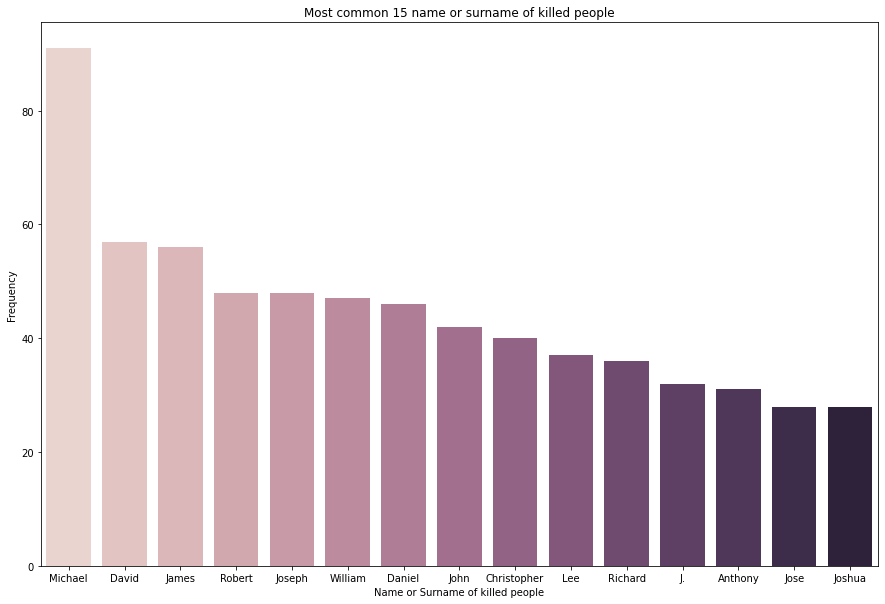

In [10]:
separate = kill.name[kill.name != "TK TK"].str.split() # take names without 'TK TK'

a,b = zip(*separate) 

name_list = a + b 

name_count = Counter(name_list) 

most_comon_names = name_count.most_common(15) 
x,y = zip(*most_comon_names)
x,y = list(x),list(y)


plt.figure(figsize = (15,10))

sns.barplot(x = x, y =y, palette = sns.cubehelix_palette(len(x))) #show barplot with harmonious plot

plt.xlabel("Name or Surname of killed people")
plt.ylabel("Frequency")
plt.title("Most common 15 name or surname of killed people")
plt.show()

In [11]:
percent_over_25_completed_highSchool.head() 

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [12]:
percent_over_25_completed_highSchool.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [13]:
percent_over_25_completed_highSchool.percent_completed_hs.value_counts()

100     1301
-        197
91.7     170
92.9     169
92.5     168
        ... 
39.3       1
20.1       1
27.2       1
36.8       1
43.9       1
Name: percent_completed_hs, Length: 728, dtype: int64

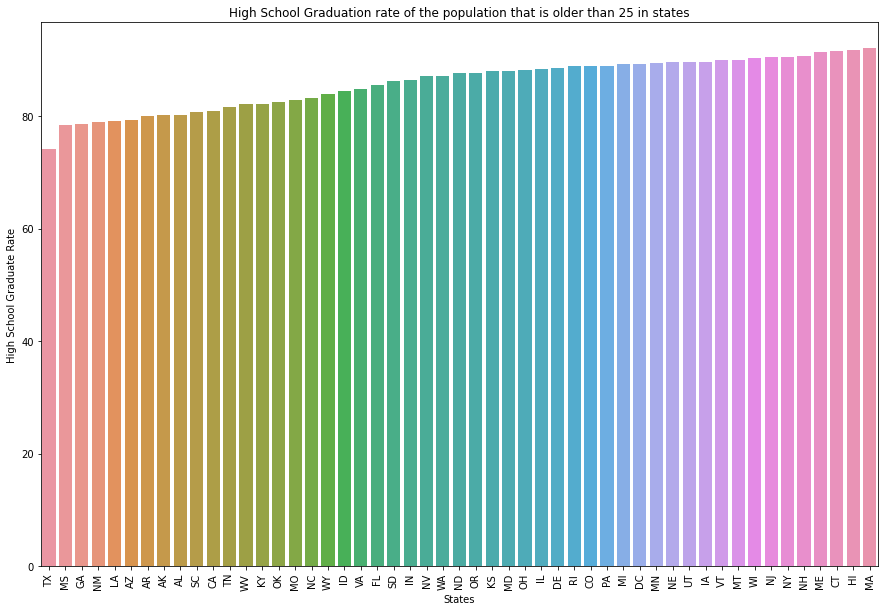

In [14]:
percent_over_25_completed_highSchool.percent_completed_hs.replace("-",0.0,inplace =True) #replacing '-' with 0
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float) #changing type from object to float

area_list = list(percent_over_25_completed_highSchool["Geographic Area"].unique()) #creating new list to all unique states

area_highschool = []
for i in area_list:
    
    
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool["Geographic Area"] == i] #selecting states
    
    area_highschool_rate = sum(x.percent_completed_hs)/len(x) #calculating rate
    
    area_highschool.append(area_highschool_rate)
    
data = pd.DataFrame({"area name": area_list , "area highschool ratio": area_highschool}) #creating new dataframe
new_index  = data["area highschool ratio"].sort_values(ascending = True).index.values #taking index of values

sorted_data2 = data.reindex(new_index)

plt.figure(figsize = (15,10))

sns.barplot(x = sorted_data2["area name"], y = sorted_data2["area highschool ratio"]) #creating barplot

plt.xticks(rotation = 90)

plt.xlabel("States")

plt.ylabel("High School Graduate Rate")
plt.title("High School Graduation rate of the population that is older than 25 in states")
plt.show()

In [15]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [16]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [17]:
share_race_city.value_counts()

Geographic area  City                 share_white  share_black  share_native_american  share_asian  share_hispanic
AK               Adak city            19.6         4            5.5                    52.5         8.9               1
OH               Galion city          97.6         0.5          0.1                    0.2          1.3               1
                 Gahanna city         82.1         11.2         0.2                    3.1          2.6               1
                 Fultonham village    100          0            0                      0            0                 1
                 Fulton village       96.9         0            0                      0            1.9               1
                                                                                                                     ..
KS               Westwood Hills city  94.4         1.7          0                      1.9          3.1               1
                 Westphalia city      90.2   

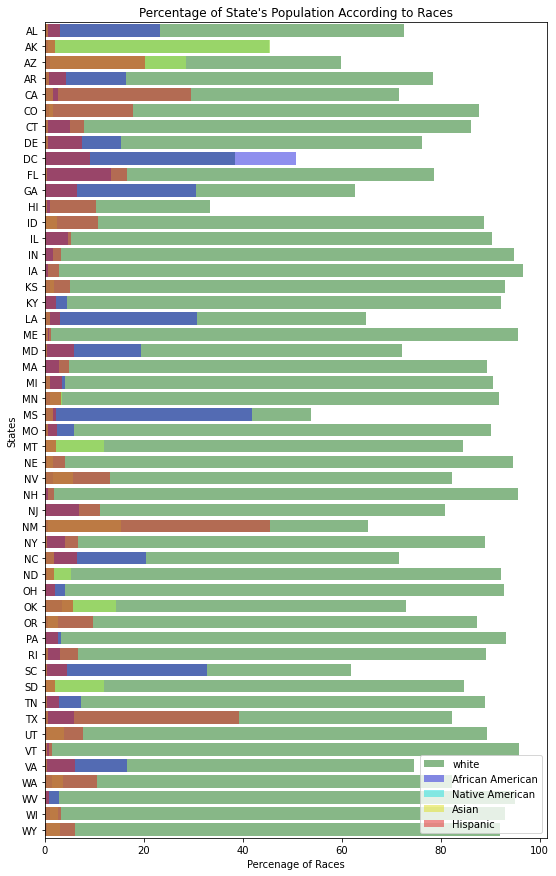

In [19]:
share_race_city.replace("-",0.0,inplace = True)
share_race_city.replace("(X)",0.0,inplace = True)
share_race_city.loc[:,["share_white","share_black","share_native_american","share_asian","share_hispanic"]] =share_race_city.loc[:,["share_white","share_black","share_native_american","share_asian","share_hispanic"]].astype(float)
area_list = share_race_city["Geographic area"].unique()

share_white =  []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []

for i in area_list:
    
    x = share_race_city[share_race_city["Geographic area"] == i ]
    
    share_white_ratio = sum(x.share_white)/len(x)
    share_black_ratio = sum(x.share_black) / len(x)
    share_native_american_ratio = sum(x.share_native_american)/len(x)
    share_asian_ratio = sum(x.share_native_american)/len(x)
    share_hispanic_ratio = sum(x.share_hispanic)/len(x)
    
    share_white.append(share_white_ratio)
    share_black.append(share_black_ratio)
    share_native_american.append(share_native_american_ratio)
    share_asian.append(share_asian_ratio)
    share_hispanic.append(share_hispanic_ratio)
    
f,ax = plt.subplots(figsize = (9,15))

sns.barplot(x = share_white, y = area_list, color="green",alpha = 0.5,label = "white")
sns.barplot(x = share_black, y = area_list, color="blue",alpha = 0.5,label = "African American")
sns.barplot(x = share_native_american, y = area_list, color="cyan",alpha = 0.5,label = "Native American")
sns.barplot(x = share_asian, y = area_list, color="yellow",alpha = 0.5,label = "Asian")
sns.barplot(x = share_hispanic, y = area_list, color="red",alpha = 0.5,label = "Hispanic")

ax.legend(loc = "lower right",frameon = True) #showing legends
ax.set(xlabel = "Percenage of Races",ylabel = "States",title = "Percentage of State's Population According to Races")


plt.show()

In [20]:
sorted_data.head()

,area_list,area_poverty_ratio
24,MS,26.884254
2,AZ,25.268071
10,GA,23.663636
3,AR,22.963216
31,NM,22.507675


In [21]:
sorted_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 24 to 30
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area_list           51 non-null     object 
 1   area_poverty_ratio  51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [22]:
sorted_data2.head()

,area name,area highschool ratio
43,TX,74.086949
24,MS,78.470718
10,GA,78.634450
31,NM,78.971783
18,LA,79.122363


In [23]:
sorted_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 43 to 21
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area name              51 non-null     object 
 1   area highschool ratio  51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


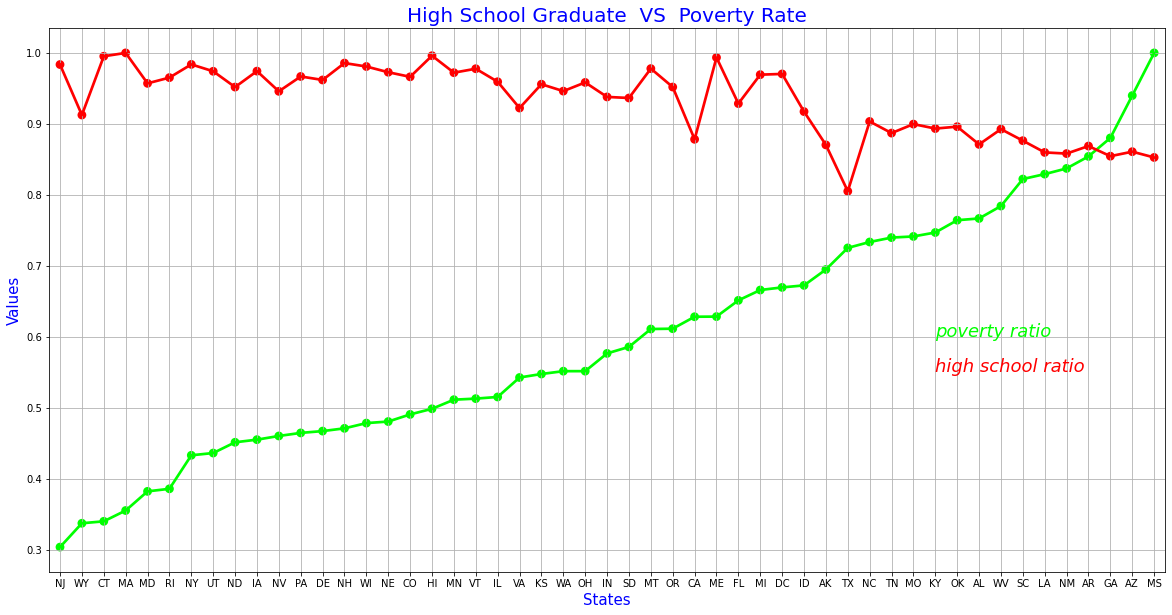

In [24]:
sorted_data["area_poverty_ratio"] = sorted_data["area_poverty_ratio"]/max(sorted_data["area_poverty_ratio"])
sorted_data2["area highschool ratio"] = sorted_data2["area highschool ratio"]/max(sorted_data2["area highschool ratio"])
data = pd.concat([sorted_data,sorted_data2["area highschool ratio"]],axis = 1)
data.sort_values("area_poverty_ratio",inplace = True)

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='area_list',y='area_poverty_ratio',data=data,color='lime',alpha=0.8)
sns.pointplot(x='area_list',y='area highschool ratio',data=data,color='red',alpha=0.8)
plt.text(40,0.6,"poverty ratio",color = "lime",fontsize = 18,style = "italic")
plt.text(40,0.55,"high school ratio",color = "red",fontsize = 18,style = "italic")
plt.xlabel('States',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('High School Graduate  VS  Poverty Rate',fontsize = 20,color='blue')
plt.grid()

In [25]:
kill.manner_of_death.head()

0                shot
1                shot
2    shot and Tasered
3                shot
4                shot
Name: manner_of_death, dtype: object

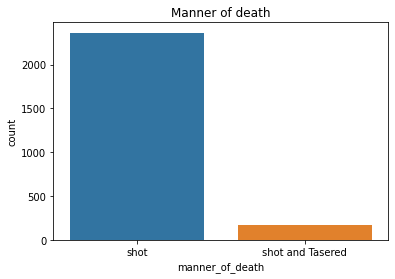

In [26]:
sns.countplot(kill.manner_of_death) 

plt.title("Manner of death")
plt.show()

In [27]:
kill.armed.head()

0           gun
1           gun
2       unarmed
3    toy weapon
4      nail gun
Name: armed, dtype: object

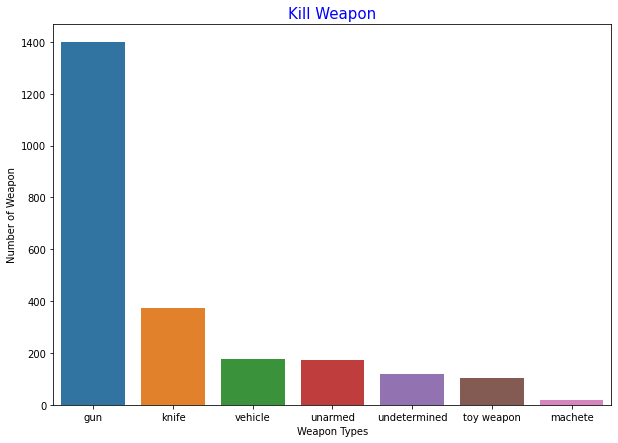

In [28]:
armed = kill.armed.value_counts()

plt.figure(figsize = (10,7))
sns.barplot(x = armed[:7].index,y = armed[:7].values) 
plt.xlabel("Weapon Types")
plt.ylabel("Number of Weapon")
plt.title("Kill Weapon",color = "blue",fontsize =15)
plt.show()

In [29]:
kill.age.head()

0    53.0
1    47.0
2    23.0
3    32.0
4    39.0
Name: age, dtype: float64

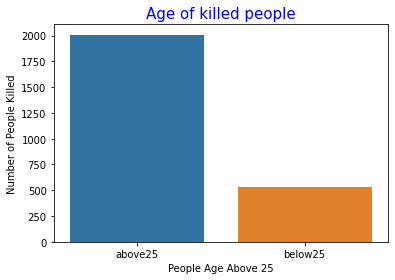

In [30]:
above25 = ["above25" if i >= 25 else "below25" for i in kill.age] #people age above 25
df = pd.DataFrame({"age": above25})

sns.countplot(x = df.age)
plt.xlabel("People Age Above 25")
plt.ylabel("Number of People Killed")
plt.title("Age of killed people",color = "blue",fontsize = 15)
plt.show()

In [31]:
kill.race.head()

0    A
1    W
2    H
3    W
4    H
Name: race, dtype: object

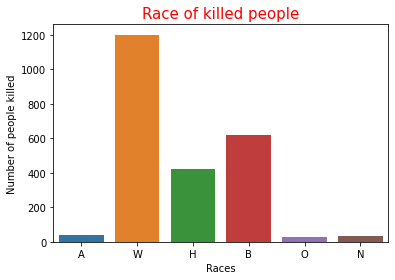

In [32]:
sns.countplot(data = kill, x = "race") 
plt.xlabel("Races")
plt.ylabel("Number of people killed")
plt.title("Race of killed people",color = "red",fontsize = 15)
plt.show()

In [33]:
kill.city.head()

0          Shelton
1            Aloha
2          Wichita
3    San Francisco
4            Evans
Name: city, dtype: object

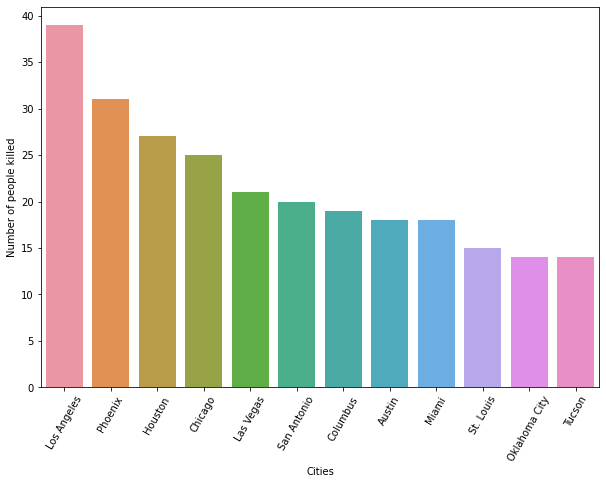

In [34]:
city = kill.city.value_counts()
plt.figure(figsize = (10,7))
sns.barplot(x = city[:12].index,y = city[:12].values) # first 12 cities
plt.xticks(rotation = 60)
plt.xlabel("Cities")
plt.ylabel("Number of people killed")
plt.show()

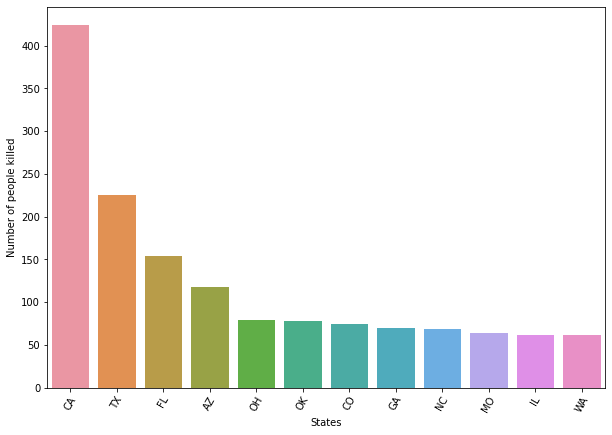

In [35]:
state = kill.state.value_counts()

plt.figure(figsize = (10,7))

sns.barplot(x = state[:12].index,y = state[:12].values)
plt.xticks(rotation = 60)
plt.xlabel("States")
plt.ylabel("Number of people killed")
plt.show()

In [36]:
kill.signs_of_mental_illness.head()

0     True
1    False
2    False
3     True
4    False
Name: signs_of_mental_illness, dtype: bool

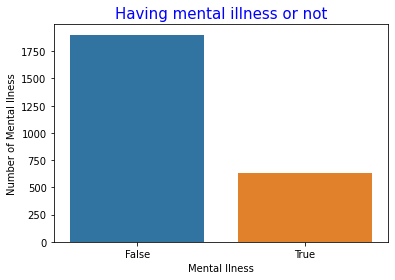

In [37]:
sns.countplot(kill.signs_of_mental_illness)
plt.xlabel("Mental Ilness")
plt.ylabel("Number of Mental Ilness")
plt.title("Having mental illness or not",color = "blue",fontsize =15)
plt.show()

In [38]:
kill.threat_level.head()

0    attack
1    attack
2     other
3    attack
4    attack
Name: threat_level, dtype: object

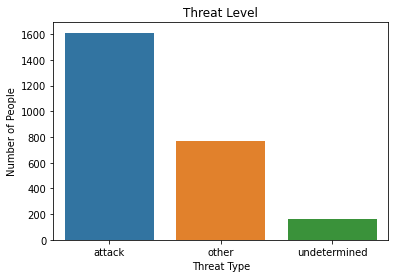

In [39]:
sns.countplot(kill.threat_level)
plt.xlabel("Threat Type")
plt.ylabel("Number of People")
plt.title("Threat Level")
plt.show()

In [40]:
kill.flee.head()

0    Not fleeing
1    Not fleeing
2    Not fleeing
3    Not fleeing
4    Not fleeing
Name: flee, dtype: object

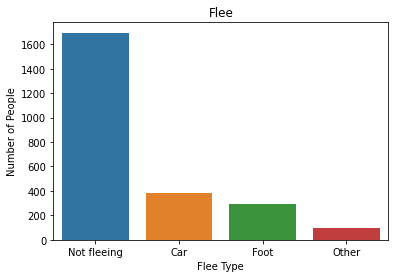

In [41]:
sns.countplot(kill.flee)
plt.xlabel("Flee Type")
plt.ylabel("Number of People")
plt.title("Flee")
plt.show()

In [42]:
kill.body_camera.head()

0    False
1    False
2    False
3    False
4    False
Name: body_camera, dtype: bool